 # Hackaton Neuronal Network
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : MLP \\
  Deadline      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1:
 - Integrante 2:
 - Integrante 3:
 - Integrante 4:


 ----

In [3]:
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import cvxopt
import seaborn as sns
import itertools
import pywt
import os
from sklearn.metrics import confusion_matrix

# Mel-frequency cepstral coefficient
For obtaining the feature vector from the audio file, we will use the mel-frequency cepstral coefficients [(MFCC).](https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html), and for  obtain this  mel-frequency from an audio, we will use the librosa [library](https://librosa.org/doc/latest/index.html).

----

The following code shows how to load an audio file with librosa and how to play it.

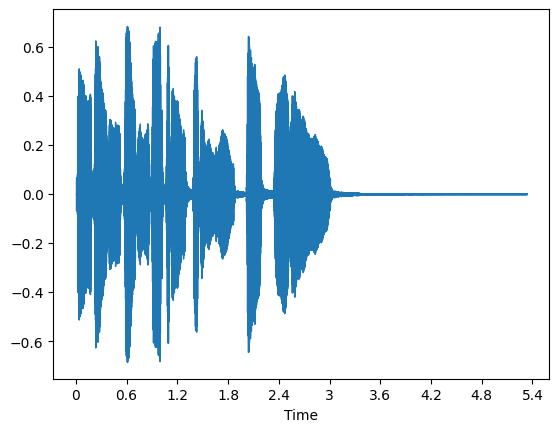

In [4]:
import librosa
import matplotlib.pylab as plt

from IPython.display import Audio
y, sr = librosa.load(librosa.ex('trumpet'))

librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

# Feacture Vector

To obtain the feature vector, we divide the signal into windows. We will have a total of 20 windows, and from each window, we will extract 230 mel coefficients. We then calculate the average of the coefficients from each window, resulting in a 20-dimensional vector for each audio signal. This vector is the characteristic vector that represents an audio signal.

You and your team can vary the way in which the feature vector is obtained. For example, instead of just taking the average of each window, we could take statistical measures such as the mean, maximum value, minimum value, and standard deviation for each window. These values from all the windows could then be combined into a larger characteristic vecto.

----

The following code shows how to obtein the characteristics vector of an audio using mel coefficients.


In [5]:
y, sr = librosa.load(librosa.ex('trumpet'))
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print("Each windows is represented by a 230-dimensional vector, and the audio has been divided into 20 windows" ,  mfccs.shape)
print("If we calculate the mean of the coefficients from each of the 20 windows, we will obtain a single 20-dimensional vector. This is the characteristic vector of the audio signal ")
feacture_vector = mfccs.mean(axis = 1)
print(feacture_vector)
print("Vector dimension: " , feacture_vector.shape)

Audio(data=y, rate=sr)

Each windows is represented by a 230-dimensional vector, and the audio has been divided into 20 windows (20, 230)
If we calculate the mean of the coefficients from each of the 20 windows, we will obtain a single 20-dimensional vector. This is the characteristic vector of the audio signal 
[-4.4225790e+02  5.0383904e+01 -7.0578918e+01 -1.8441648e+01
 -1.6287884e+01 -1.8831697e+01 -2.1320690e+01 -1.3630636e+01
 -2.0642900e+01 -1.2660914e+01 -9.4624376e+00 -4.9655867e+00
  3.9786708e-01  4.6334119e+00  4.7938657e+00  4.0112100e+00
  5.0261889e+00  4.7590756e+00  3.7942648e+00  5.7539124e+00]
Vector dimension:  (20,)


# DataSet

Download the dataset from [here](https://drive.google.com/drive/folders/1VfthX0TIhDMsc7rp3ES6ApVwdBLSK4_e?usp=sharing) or simply create a shortcut in your Google Drive.

----

- The following code demonstrates how to load your Google Drive.
- Rewrite the path in case your dataset is located in a different directory on your google drive.

In [6]:
# from google.colab import drive
# drive.mount('/content/drive/')
# "Rewrite the path in case your dataset is located in a different directory on your drive.

# path = '/content/drive/MyDrive/UTEC/CURSOS/2024.1/MACHINE LEARNING/PRACTICA/DataSet/DataSet_Cat_Dog'
# path = '/content/drive/MyDrive/{}'.format("1VfthX0TIhDMsc7rp3ES6ApVwdBLSK4_e")

path = '.'


**"If your directory is correct, you should be able to listen to the following audio**

In [26]:
y, sr = librosa.load(path + "/test/dog/dog_barking_15.wav" )
mfccs = librosa.feature.mfcc(y=y, sr=sr)
feacture_vector = np.array(mfccs.mean(axis = 1))
print("Feacture Vector of the dog sound :" , feacture_vector)
Audio(data=y, rate=sr)


# Uncomment to listen to an example of the sound of a cat
#y, sr = librosa.load(path + "/test/cat/cat_88.wav" )
#Audio(data=y, rate=sr)


Feacture Vector of the dog sound : [-292.7673     118.35525    -60.666      -29.93634    -27.660461
  -29.684113   -21.906305   -20.586025    -6.1135497  -11.085019
   -2.099951     7.5590677    0.7164103    4.3795238   -2.8995037
  -13.28882     -7.255674    -1.2405518   -4.5105443   -4.4990487]


The code provided below accepts the path to your database directory and the type of dataset you wish to load as input. The default dataset is 'train', but you can also opt for 'test'. It returns the feature vectors for all the audio files, along with their labels (1, 0, -1) if you're employing SVM. Should you prefer, the labels can be adjusted to 1 or 0 for use with logistic regression.

In [9]:
import numpy as np
import os

def encode(path, data_type = 'train', label = -1):
  data1 = []
  directory_1 = os.listdir(path + '/' + data_type + "/cat")
  print(directory_1)
  for f  in directory_1:
    y, sr = librosa.load(path + '/' +  data_type + "/cat/" + f)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    fv = mfccs.mean(axis = 1)
    data1.append(fv)
  data = np.array(data1)
  # Important: Here the label is added; in this case, it is 1, but it may vary according to your requirements.
  data  = np.insert(data, 0, 1, axis=1)

  data2 = []
  directory_2 =  os.listdir(path + '/' +   data_type + "/dog")
  for f  in directory_2:
    y, sr = librosa.load(path + '/' +  data_type + "/dog/" + f)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    fv = mfccs.mean(axis = 1)
    data2.append(fv)
  temp = np.array(data2)
   # Important: Here the label is added; in this case, it is -1, but it may vary according to your requirements.
  temp = np.insert(temp, 0, label, axis=1)


  data = np.concatenate((data, temp), axis=0)
  np.random.shuffle(data)
  y = data[:,0]
  x = data[:, 1:]
  return x, y


# Data Train and Data Test

By this point, your team should already have the training and testing data fully prepared for use in your model. Therefore, your team should focus solely on running your models and achieving good results.

In [27]:
x_train,y_train = encode(path)
x_test, y_test = encode(path, 'test')

x_train_lr,y_train_lr = encode(path, label=0)
x_test_lr, y_test_lr = encode(path, 'test', label=0)

print("Train data shape: ", x_train.shape)
print("Test data shape: ", x_test.shape)
print("Train data shape: ", x_train_lr.shape)
print("Test data shape: ", x_test_lr.shape)

print("Train data labels: ", y_train.shape)
print("Test data labels: ", y_test.shape)
print("Train data labels: ", y_train_lr.shape)
print("Test data labels: ", y_test_lr.shape)

['cat_1.wav', 'cat_10.wav', 'cat_100.wav', 'cat_101.wav', 'cat_102.wav', 'cat_103.wav', 'cat_105.wav', 'cat_106.wav', 'cat_107.wav', 'cat_108.wav', 'cat_109.wav', 'cat_11.wav', 'cat_113.wav', 'cat_114.wav', 'cat_116.wav', 'cat_117.wav', 'cat_118.wav', 'cat_119.wav', 'cat_12.wav', 'cat_120.wav', 'cat_121.wav', 'cat_122.wav', 'cat_123.wav', 'cat_124.wav', 'cat_125.wav', 'cat_127.wav', 'cat_128.wav', 'cat_13.wav', 'cat_131.wav', 'cat_132.wav', 'cat_134.wav', 'cat_136.wav', 'cat_138.wav', 'cat_139.wav', 'cat_140.wav', 'cat_141.wav', 'cat_142.wav', 'cat_146.wav', 'cat_147.wav', 'cat_149.wav', 'cat_15.wav', 'cat_150.wav', 'cat_151.wav', 'cat_153.wav', 'cat_154.wav', 'cat_155.wav', 'cat_156.wav', 'cat_157.wav', 'cat_159.wav', 'cat_16.wav', 'cat_160.wav', 'cat_161.wav', 'cat_162.wav', 'cat_163.wav', 'cat_164.wav', 'cat_165.wav', 'cat_166.wav', 'cat_167.wav', 'cat_18.wav', 'cat_19.wav', 'cat_2.wav', 'cat_21.wav', 'cat_22.wav', 'cat_23.wav', 'cat_25.wav', 'cat_26.wav', 'cat_27.wav', 'cat_30.wav'

In [15]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def matriz_confusion(y_test, y_pred, tipo):
    matrix = confusion_matrix(y_test, y_pred)
    f2 = pd.DataFrame(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], index=["Dog", 'Cat'], columns=["Dog", 'Cat'])
    sns.heatmap(f2, annot=True, cbar=None, cmap="Greens")
    plt.title(f"Confusion Matrix {tipo}")
    plt.tight_layout()
    plt.xlabel("Predicted")
    plt.ylabel("Real")
    plt.show()


# Model

Design an MLP model using the Python library.
Think about the number of neurons in the input layer, the number of neurons in the hidden layer, and the number of neurons in the output layer.

----

## Remember, tu equipo puede usar pythorn y sklearn.

In [28]:
# Write here your o yours models.

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train(model, x_train, y_train, epochs=1000, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    x_train = torch.tensor(x_train, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)

    # Ajuste de las etiquetas: Convertir -1 a 0 y 1 a 1
    y_train = torch.where(y_train == -1, 0, y_train)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        output = model(x_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print(f'Epoch {epoch} / {epochs}, Loss: {loss.item()}')


model = Net()

train(model, x_train, y_train, epochs=1000, lr=0.001)

Epoch 0 / 1000, Loss: 0.7371482253074646
Epoch 50 / 1000, Loss: 0.7180235981941223
Epoch 100 / 1000, Loss: 0.7180235981941223
Epoch 150 / 1000, Loss: 0.7180235981941223
Epoch 200 / 1000, Loss: 0.7180235385894775
Epoch 250 / 1000, Loss: 0.7180219292640686
Epoch 300 / 1000, Loss: 0.710873544216156
Epoch 350 / 1000, Loss: 0.708509087562561
Epoch 400 / 1000, Loss: 0.7085051536560059
Epoch 450 / 1000, Loss: 0.7085036635398865
Epoch 500 / 1000, Loss: 0.7085028290748596
Epoch 550 / 1000, Loss: 0.7085022926330566
Epoch 600 / 1000, Loss: 0.7085016965866089
Epoch 650 / 1000, Loss: 0.7085012793540955
Epoch 700 / 1000, Loss: 0.7085009813308716
Epoch 750 / 1000, Loss: 0.7085008025169373
Epoch 800 / 1000, Loss: 0.7085006833076477
Epoch 850 / 1000, Loss: 0.7085005044937134
Epoch 900 / 1000, Loss: 0.7085004448890686
Epoch 950 / 1000, Loss: 0.7085004448890686


# Test

At this stage, you should test the results of your Neural Network models. Show a confusion matrix and use the metrics f1_score, precision, and recall.



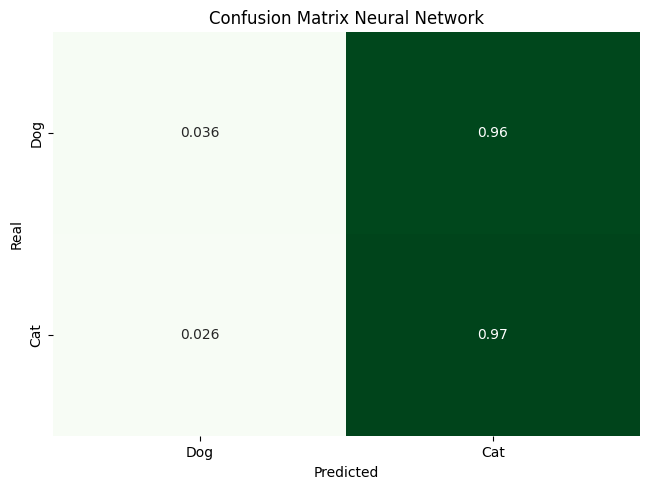

F1 Score: 0.7307692307692307
Precision: 0.5846153846153846
Recall: 0.9743589743589743


In [30]:
# Write your code here

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def calculate_metrics(y_test, y_pred):
    y_test_np = y_test.numpy()
    y_pred_np = y_pred.numpy()
    f1 = f1_score(y_test_np, y_pred_np)
    precision = precision_score(y_test_np, y_pred_np)
    recall = recall_score(y_test_np, y_pred_np)
    print(f'F1 Score: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')

def test(model, x_test, y_test):
    model.eval()
    x_test = torch.tensor(x_test, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.long)

    # Ajuste de las etiquetas: Convertir -1 a 0 y 1 a 1
    y_test = torch.where(y_test == -1, 0, y_test)

    with torch.no_grad():
        y_pred = model(x_test)
        y_pred = torch.argmax(y_pred, 1)

    matriz_confusion(y_test, y_pred, "Neural Network")
    calculate_metrics(y_test, y_pred)


test(model, x_test, y_test)

# Experiment with other methods
Finally, use scikit-learn to train an SVM and a Decision Tree and generate the confusion matrices and the same metrics. Compare the results and indicate which model is better.

Upload the images of the confusion matrices of the 3 methods to Discord: the neural network, the SVM, and the Decision Tree.